In [82]:
import sys
sys.path.append('d:\\work_D\\code and data\\')

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cfgrib
import xarray as xr
import plotting

In [84]:
fl = r'D:\work_D\data\ERA5_old\target_grid_x9.npy'

In [85]:
target = np.load(fl)
target.shape

(2192, 41, 65)

### Plots

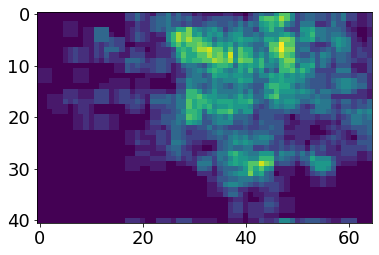

In [86]:
plt.imshow(np.sum(target[0:366], axis=0))

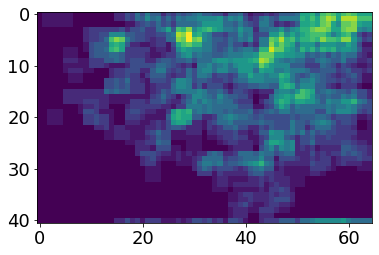

In [87]:
plt.imshow(np.sum(target[366:731], axis=0))

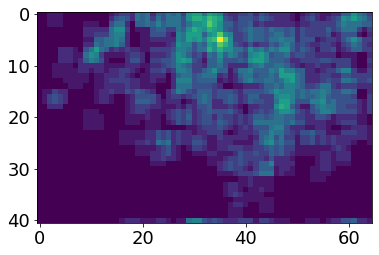

In [88]:
plt.imshow(np.sum(target[731:1096], axis=0))

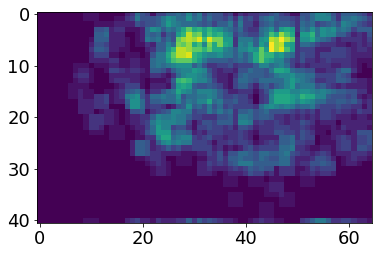

In [89]:
plt.imshow(np.sum(target[1096:1461], axis=0))

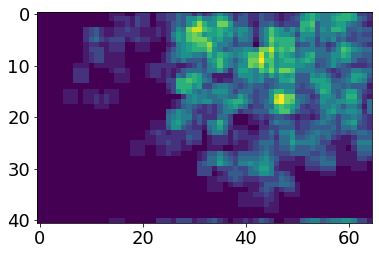

In [90]:
plt.imshow(np.sum(target[1461:1826], axis=0))

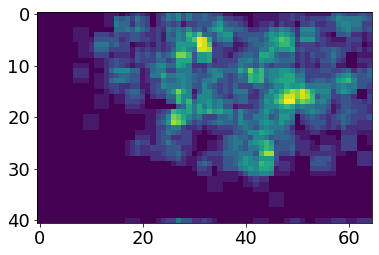

In [91]:
plt.imshow(np.sum(target[1826:], axis=0) / np.sum(target[1826:]))

### Better plots

In [92]:
xrds = xr.open_dataset(r'D:\work_D\data\ERA5_old\Texas_NewMexico\land\2021.grib', engine='cfgrib')
xrds.d2m[0].shape

(41, 65)

In [93]:
lats = xrds.d2m[0].latitude.data
lons = xrds.d2m[0].longitude.data

In [112]:
b_left, b_right = 1461, 1826
data1 = np.sum(target[b_left:b_right], axis=0) / target[b_left:b_right].shape[0] #np.sum(target[0:366])
data2 = np.sum(target[1096:1461], axis=0) / target[1096:1461].shape[0] #np.sum(target[0:366])
# 1461:1826 1096:1461 0:366


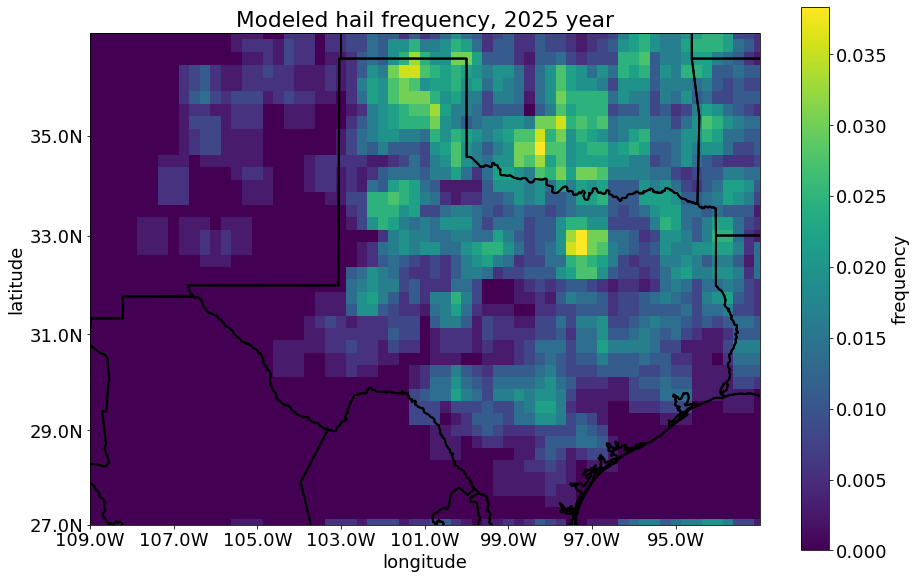

In [129]:
from turtle import title


plt.rcParams.update({'font.size': 18})

ds1 = xr.Dataset(
    data_vars=dict(
        frequency=(["latitude", "longitude"], data1)
    ),
    coords=dict(
        latitude=(["latitude"], lats),
        longitude=(["longitude"], lons),
    ),
    attrs=dict(description="preds"),
)

ds2 = xr.Dataset(
    data_vars=dict(
        frequency=(["latitude", "longitude"], data2)
    ),
    coords=dict(
        latitude=(["latitude"], lats),
        longitude=(["longitude"], lons),
    ),
    attrs=dict(description="preds"),
)

ds_dif = xr.Dataset(
    data_vars=dict(
        frequency=(["latitude", "longitude"], data2 - data1)
    ),
    coords=dict(
        latitude=(["latitude"], lats),
        longitude=(["longitude"], lons),
    ),
    attrs=dict(description="difs"),
)

plotting.plot_xarray_grib(ds1.frequency, bounds=[-109, -93, 27, 37], 
    title='Modeled hail frequency, 2025 year')

plt.savefig(r'D:\work_D\pics\modeled25.png')

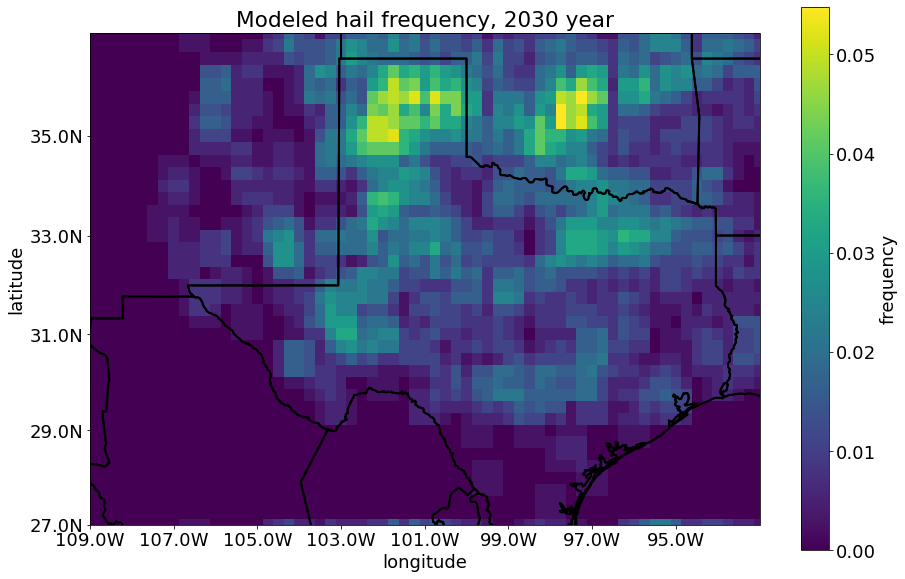

In [126]:
plotting.plot_xarray_grib(ds2.frequency, bounds=[-109, -93, 27, 37],
    title='Modeled hail frequency, 2030 year')

plt.savefig(r'D:\work_D\pics\modeled30.png')

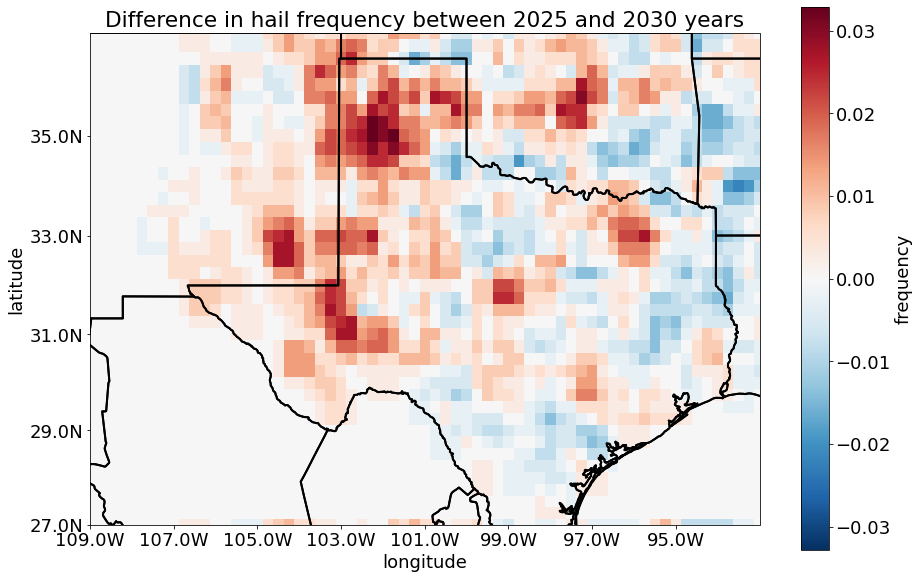

In [130]:
plotting.plot_xarray_grib(ds_dif.frequency, bounds=[-109, -93, 27, 37],
    title='Difference in hail frequency between 2025 and 2030 years')

plt.savefig(r'D:\work_D\pics\delta25-30.png')

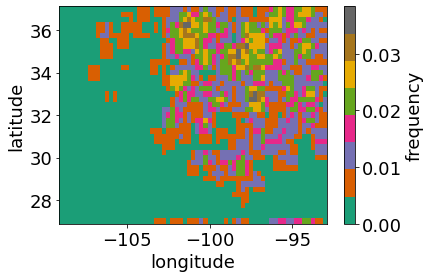

In [128]:
ds1.frequency.plot(cmap='Dark2')